# Modellizzazione del PIL italiano

## Caricamento del dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


#### CARICAMENTO DEI DATI SUL GDP ####
dataset = pd.read_csv("GDPITA2.csv", delimiter=";")
print(dataset)
dataset.pop('DATE')
dataset['date'] = pd.period_range(start= '1995Q1', end= '2022Q2', freq='Q')
dataset.set_index("date", inplace=True)

print(dataset)
print(dataset.describe())

           DATE    GDPITA      EXPO   YIELD10Y    UN_RATE
0    01/01/1995  351786.0   59192.6  12.738497  11.233333
1    01/04/1995  352890.0   62033.5  12.695790  11.100000
2    01/07/1995  352158.0   61185.2  11.804110  11.166667
3    01/10/1995  355198.0   62691.9  11.587067  11.100000
4    01/01/1996  357430.1   62171.6  10.546097  11.000000
..          ...       ...       ...        ...        ...
105  01/04/2021  390401.9  142144.4   0.885577   9.800000
106  01/07/2021  401449.4  149178.7   0.717433   9.100000
107  01/10/2021  404847.4  153981.4   1.003623   9.000000
108  01/01/2022  405417.7  168063.5   1.664600   8.500000
109  01/04/2022  409840.1  177381.3   3.021933   8.066667

[110 rows x 5 columns]
          GDPITA      EXPO   YIELD10Y    UN_RATE
date                                            
1995Q1  351786.0   59192.6  12.738497  11.233333
1995Q2  352890.0   62033.5  12.695790  11.100000
1995Q3  352158.0   61185.2  11.804110  11.166667
1995Q4  355198.0   62691.9  11.5870

## Plot dei grafici


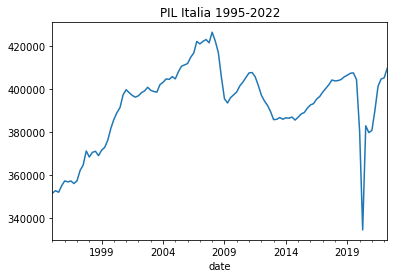

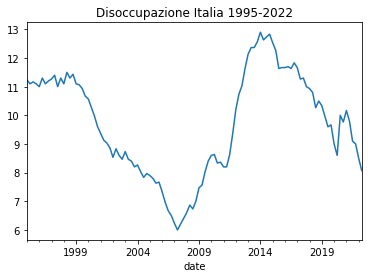

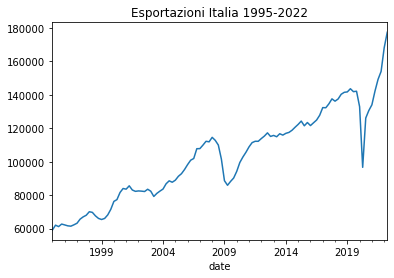

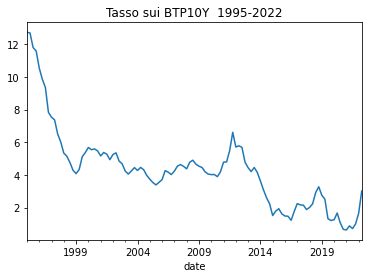

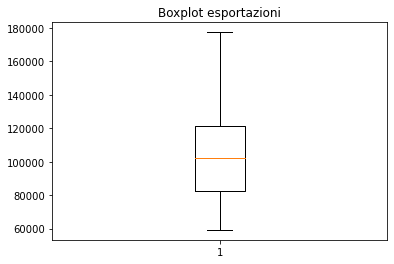

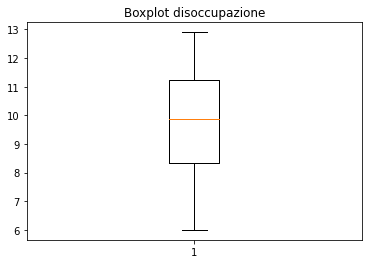

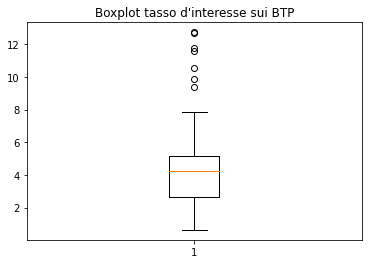

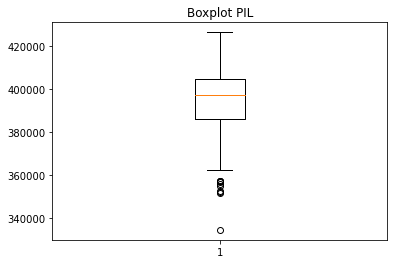

In [2]:
dataset['GDPITA'].plot()
plt.title("PIL Italia 1995-2022")
plt.show()


dataset['UN_RATE'].plot()
plt.title("Disoccupazione Italia 1995-2022")
plt.show()

dataset['EXPO'].plot()
plt.title("Esportazioni Italia 1995-2022")
plt.show()

dataset['YIELD10Y'].plot()
plt.title("Tasso sui BTP10Y  1995-2022")
plt.show()

#### BOXPLOT ####

plt.boxplot(dataset.EXPO)
plt.title("Boxplot esportazioni")
plt.show()

plt.boxplot(dataset.UN_RATE)
plt.title("Boxplot disoccupazione")
plt.show()

plt.boxplot(dataset.YIELD10Y)
plt.title("Boxplot tasso d'interesse sui BTP")
plt.show()

plt.boxplot(dataset.GDPITA)
plt.title("Boxplot PIL")
plt.show()

## Test di stazionarietà con ADF test

In [4]:
from statsmodels.tsa.stattools import adfuller
result1 = adfuller(dataset.GDPITA, autolag='BIC')
print("il test di dickey fuller per GDPITA è:\n")
print(f'ADF Statistic: {result1[0]}') #stampa il valore dell'adf test
print(f'p-value: {result1[1]}') #esprime il p value del test
print("\n")

result2 = adfuller(dataset.EXPO, autolag='BIC')
print("il test di dickey fuller per EXPO è:\n")
print(f'ADF Statistic: {result2[0]}') #stampa il valore dell'adf test
print(f'p-value: {result2[1]}') #esprime il p value del test
print("\n")

result3 = adfuller(dataset.UN_RATE, autolag='BIC')
print("il test di dickey fuller per UN_RATE è:\n")
print(f'ADF Statistic: {result3[0]}')
print(f'p-value: {result3[1]}')
print("\n")

result4 = adfuller(dataset.YIELD10Y, autolag='BIC')
print("il test di dickey fuller per YIELD10Y è:\n")
print(f'ADF Statistic: {result4[0]}')
print(f'p-value: {result4[1]}')
print("\n")

il test di dickey fuller per GDPITA è:

ADF Statistic: -2.696922996655235
p-value: 0.07457224019733623


il test di dickey fuller per EXPO è:

ADF Statistic: 0.16156422217961408
p-value: 0.9700215578407378


il test di dickey fuller per UN_RATE è:

ADF Statistic: -1.7822613623109633
p-value: 0.38930331452465367


il test di dickey fuller per YIELD10Y è:

ADF Statistic: -4.144478778946288
p-value: 0.0008169462426351354




## Variazioni percentuali della serie

          GDPITA      EXPO   YIELD10Y   UN_RATE
date                                           
1995Q2  0.313827  4.799417  -0.335257 -1.186944
1995Q3 -0.207430 -1.367487  -7.023431  0.600601
1995Q4  0.863249  2.462524  -1.838710 -0.597015
1996Q1  0.628410 -0.829932  -8.983896 -0.900901
1996Q2 -0.129788 -0.868885  -6.426295  2.727273
...          ...       ...        ...       ...
2021Q2  2.490394  6.089707  39.091442 -3.606557
2021Q3  2.829776  4.948700 -18.986875 -7.142857
2021Q4  0.846433  3.219427  39.890814 -1.098901
2022Q1  0.140868  9.145325  65.859037 -5.555556
2022Q2  1.090826  5.544214  81.541111 -5.098039

[109 rows x 4 columns]


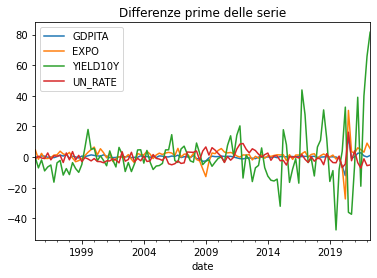

In [5]:
dataset_var = dataset.pct_change().mul(100).dropna() #questo metodo elimina direttamente il valore nan dalla prima riga
print(dataset_var)
dataset_var.plot()
plt.title("Differenze prime delle serie")
plt.show()

## ADF test sulle variazioni

In [7]:
result5 = adfuller(dataset_var.GDPITA, autolag='BIC')
print("il test di dickey fuller per GDPITA_var è:\n")
print(f'ADF Statistic: {result5[0]}')
print(f'p-value: {result5[1]}')
print("\n")

result6 = adfuller(dataset_var.EXPO, autolag='BIC')
print("il test di dickey fuller per EXPO_var è:\n")
print(f'ADF Statistic: {result6[0]}')
print(f'p-value: {result6[1]}')
print("\n")

result7 = adfuller(dataset_var.UN_RATE, autolag='BIC')
print("il test di dickey fuller per UN_RATE_var è:\n")
print(f'ADF Statistic: {result7[0]}')
print(f'p-value: {result7[1]}')
print("\n")

result8 = adfuller(dataset_var.YIELD10Y, autolag='BIC')
print("il test di dickey fuller per YIELD10Y_var è:\n")
print(f'ADF Statistic: {result8[0]}')
print(f'p-value: {result8[1]}')
print("\n")

il test di dickey fuller per GDPITA_var è:

ADF Statistic: -12.232793124064079
p-value: 1.0443365743565065e-22


il test di dickey fuller per EXPO_var è:

ADF Statistic: -10.848524726624639
p-value: 1.550046129668337e-19


il test di dickey fuller per UN_RATE_var è:

ADF Statistic: -4.637908212345553
p-value: 0.00010990888800095566


il test di dickey fuller per YIELD10Y_var è:

ADF Statistic: -5.704233623994008
p-value: 7.552784018538399e-07




## PACF e ACF

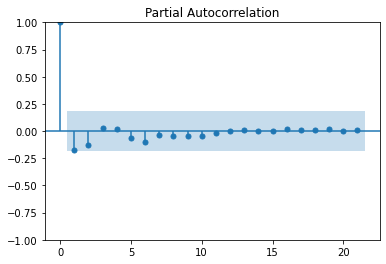

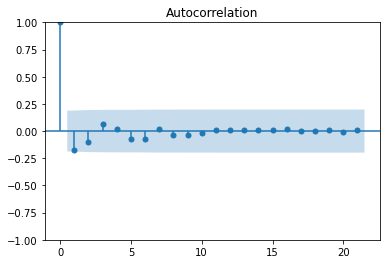

In [9]:
#### PACF E ACF ####
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dataset_var.GDPITA, method='ywm')

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataset_var.GDPITA)
plt.show()

## Split dei dati

In [12]:
#### SPLITTING DEI DATI ####
size = int(len(dataset_var)*0.8)
train, test = dataset_var.iloc[:size], dataset_var.iloc[size:]
print(test.describe())


          GDPITA       EXPO   YIELD10Y    UN_RATE
count  22.000000  22.000000  22.000000  22.000000
mean    0.240222   1.938828   7.139012  -1.618588
std     4.407567   9.442398  32.362958   4.881468
min   -12.101348 -27.284449 -47.522179  -7.142857
25%     0.039349   0.176856 -11.423286  -4.253066
50%     0.242285   1.904869   1.539084  -2.494100
75%     0.532677   3.581125  30.061817  -0.729271
max    14.476292  30.515775  81.541111  16.279070


## AUTOARIMA

In [10]:
### AUTOARIMA ####
import pmdarima as pm
import warnings
warnings.filterwarnings("ignore")

model_auto = pm.auto_arima(dataset_var.GDPITA)  #, exogenous = dataset_var['UN_RATE']
print(model_auto.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  109
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -231.015
Date:                Tue, 08 Nov 2022   AIC                            466.030
Time:                        11:59:25   BIC                            471.413
Sample:                    06-30-1995   HQIC                           468.213
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1975      0.022     -9.134      0.000      -0.240      -0.155
sigma2         4.0575      0.149     27.179      0.000       3.765       4.350
Ljung-Box (L1) (Q):                   0.00   Jarque-

## Modello ARMA(0,1)

                               SARIMAX Results                                
Dep. Variable:                 GDPITA   No. Observations:                  109
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -230.480
Date:                Mon, 07 Nov 2022   AIC                            466.960
Time:                        01:34:28   BIC                            475.034
Sample:                    06-30-1995   HQIC                           470.235
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1588      0.309      0.513      0.608      -0.447       0.765
ma.L1         -0.2099      0.041     -5.097      0.000      -0.291      -0.129
sigma2         4.0176      0.180     22.313      0.0

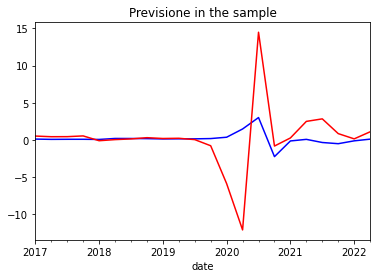

In [30]:
#### ARMA (0,0,1) ####
from statsmodels.tsa.arima.model import ARIMA

arma_model = ARIMA(dataset_var.GDPITA, order=(0, 0, 1))
fit_model = arma_model.fit()
print(fit_model.summary())

#PREVISIONE

dataset_pred_arma = fit_model.predict(start= start_date, end= end_date)
dataset_pred_arma[start_date:end_date].plot(color='blue')
test.GDPITA[start_date:end_date].plot(color = 'red')
plt.title("Previsione in the sample")
plt.show()

                               SARIMAX Results                                
Dep. Variable:                 GDPITA   No. Observations:                  109
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -136.794
Date:                Tue, 08 Nov 2022   AIC                            285.589
Time:                        12:03:51   BIC                            301.737
Sample:                    06-30-1995   HQIC                           292.137
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2472      0.092     -2.696      0.007      -0.427      -0.067
EXPO           0.3718      0.011     34.675      0.000       0.351       0.393
YIELD10Y      -0.0151      0.005     -3.212      0.0

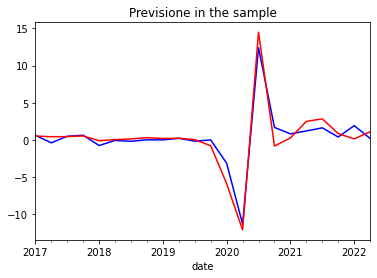

In [13]:
#### ARMAX (0,0,1) ####
from statsmodels.tsa.arima.model import ARIMA

armax_model = ARIMA(dataset_var.GDPITA, order=(0, 0, 1), exog = dataset_var[['EXPO','YIELD10Y', 'UN_RATE']])
result = armax_model.fit()
print(result.summary())

# PREVISIONE
start_date = "2017Q1"
end_date = "2022Q2"

dataset_pred_arma = result.predict(start= start_date, end= end_date)
dataset_pred_arma[start_date:end_date].plot(color='blue')
test.GDPITA[start_date:end_date].plot(color = 'red')
plt.title("Previsione in the sample")
plt.show()

## Modello VAR 

In [29]:
#### MOELLO VAR ORDER SELECTION ####
from statsmodels.tsa.api import VAR

model = VAR(train)
order_model = model.select_order(maxlags=10)
print(order_model.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        7.678      7.800*       2161.       7.727
1        7.226       7.835       1376.      7.469*
2       7.148*       8.244      1277.*       7.587
3        7.306       8.888       1508.       7.939
4        7.395       9.465       1676.       8.223
5        7.565       10.12       2043.       8.588
6        7.542       10.59       2078.       8.759
7        7.680       11.21       2531.       9.093
8        7.893       11.91       3393.       9.500
9        8.074       12.58       4532.       9.876
10       8.000       12.99       4859.       9.996
--------------------------------------------------


In [25]:
#### MODELLO VAR ####

from statsmodels.tsa.statespace.varmax import VARMAX

var_model = VARMAX(dataset_var, order=(2,0), enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())


                                       Statespace Model Results                                      
Dep. Variable:     ['GDPITA', 'EXPO', 'YIELD10Y', 'UN_RATE']   No. Observations:                  109
Model:                                                VAR(2)   Log Likelihood               -1151.892
                                                 + intercept   AIC                           2395.785
Date:                                       Mon, 07 Nov 2022   BIC                           2519.587
Time:                                               01:31:55   HQIC                          2445.991
Sample:                                           06-30-1995                                         
                                                - 06-30-2022                                         
Covariance Type:                                         opg                                         
Ljung-Box (L1) (Q):      0.04, 0.01, 0.17, 0.73   Jarque-Bera (JB):   2358.63, 8.3

In [26]:
#### MAKING PREDICTION COL VAR####

predict = fitted_model.get_prediction(start="2022Q3",end="2022Q4")
predictions = predict.predicted_mean
print(predictions)

          GDPITA       EXPO   YIELD10Y   UN_RATE
2022Q3  3.750506  10.871020  36.763966 -2.134433
2022Q4  1.648642   5.816613  22.352021 -1.226870
